<a href="https://colab.research.google.com/github/viviennejuma/Football-Predictions/blob/main/regression_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Supervised Learning with Exploratory Data Analysis:
Mchezo Pesa Project **
# **1. Defining the Question**
You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

# **a) Specifying the Question**
Mchezo pesa is a football analyst company in East Africa. Mchezo-Pesa would like to predict the result of a game based whether the teams playing are in their home country or not and whether the game is friendly or not.

# **b) Defining the Metric for Success**
This project will be successful when: 1)We accurately predict the winning team based on the two factors:

   a)Home team or away team

   b)The type of tournament 

# **2)The model achieves atleast 80% accuracy**

3)Have the lowest RMSE score possible

# **c) Understanding the context**
The Coca-Cola ranking system was designed by FIFA and named 'SUM'. This ranking method utilises a metric that adds or subtracts points to the previous score instead of finding the average score. The lowest score which may be negative indicates the worst team while the highest score indicated the best team.

# **d)Experimental Design**
The project was undertaken using the following design Datasets(Fifa-ranking.csv + results.csv)

Merging datasets

Performing EDA

Feature Engineering

Polynomial Regression

Logistic regression

Computing the RMSE

Plotting residual plots

Assess their heteroscedasticity using Barlette's test

Challenging the solution

Conclusion

# **e) Data Relevance**

The relavance of our data will be answered by the following questions.

How accurate is the data at predicting the outcome of the games?

Was the dataset sufficient?

Was the data biased?

Is the data source a reliable source?

In [1]:
#loading the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#loading the FiFa ranking dataset while specifying the datetime column
ranking = pd.read_csv('fifa_ranking.csv', parse_dates=['rank_date'])
ranking.head(5)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [3]:
# Loading the FiFa results Dataset while specifying the datetime column
results = pd.read_csv('results.csv',parse_dates=['date'])
results.head(5)
#

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


# Fifa ranking dataset

In [4]:
# Determining the no. of records in our dataset and the respective datatypes
ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   rank                     57793 non-null  int64         
 1   country_full             57793 non-null  object        
 2   country_abrv             57793 non-null  object        
 3   total_points             57793 non-null  float64       
 4   previous_points          57793 non-null  int64         
 5   rank_change              57793 non-null  int64         
 6   cur_year_avg             57793 non-null  float64       
 7   cur_year_avg_weighted    57793 non-null  float64       
 8   last_year_avg            57793 non-null  float64       
 9   last_year_avg_weighted   57793 non-null  float64       
 10  two_year_ago_avg         57793 non-null  float64       
 11  two_year_ago_weighted    57793 non-null  float64       
 12  three_year_ago_avg       57793 n

In [5]:
#checking for duplicates in the results column
ranking.duplicated().sum()

37

In [6]:
#dropping the duplicated columns in the ranking dataset
#keeping the first record of the duplicates
ranking.drop_duplicates(subset = None, keep = 'first', inplace = True)
ranking.shape

(57756, 16)

In [7]:
# Previewing the top of our dataset
ranking.head(5)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [8]:
# Checking the properties of the ranking dataset
ranking.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,57756.0,101.618118,58.635096,1.0,51.0,101.0,152.0000,209.00
total_points,57756.0,121.971151,260.479191,0.0,0.0,0.0,91.5000,1775.03
previous_points,57756.0,332.339965,302.964176,0.0,56.0,272.0,525.0000,1920.00
rank_change,57756.0,-0.009938,5.802788,-72.0,-2.0,0.0,1.0000,92.00
cur_year_avg,57756.0,61.751362,138.042006,0.0,0.0,0.0,30.4475,1158.66
cur_year_avg_weighted,57756.0,61.751362,138.042006,0.0,0.0,0.0,30.4475,1158.66
last_year_avg,57756.0,60.953507,137.712945,0.0,0.0,0.0,26.4000,1169.57
last_year_avg_weighted,57756.0,30.476830,68.856514,0.0,0.0,0.0,13.2000,584.79
two_year_ago_avg,57756.0,59.734768,136.319119,0.0,0.0,0.0,21.2500,1159.71
two_year_ago_weighted,57756.0,17.920469,40.895761,0.0,0.0,0.0,6.3800,347.91


In [9]:
#chosing the relevant columns to work with.
ranking_1 = ranking[["rank","country_full","confederation","rank_date"]]
ranking_1

,rank,country_full,confederation,rank_date
0,1,Germany,UEFA,1993-08-08
1,2,Italy,UEFA,1993-08-08
2,3,Switzerland,UEFA,1993-08-08
3,4,Sweden,UEFA,1993-08-08
4,5,Argentina,CONMEBOL,1993-08-08
...,...,...,...,...
57788,206,Anguilla,CONCACAF,2018-06-07
57789,206,Bahamas,CONCACAF,2018-06-07
57790,206,Eritrea,CAF,2018-06-07
57791,206,Somalia,CAF,2018-06-07


In [10]:
#creating a copy of ranking_1 dataset
ranking_2 = ranking_1
# Separate the date column into Year and Month of the fifa_ranking dataset
ranking_2['Year'] = ranking_1.rank_date.dt.year
ranking_2['month'] =ranking_1.rank_date.dt.month
ranking_2['day'] =ranking_1.rank_date.dt.day
ranking_2.head()

,rank,country_full,confederation,rank_date,Year,month,day
0,1,Germany,UEFA,1993-08-08,1993,8,8
1,2,Italy,UEFA,1993-08-08,1993,8,8
2,3,Switzerland,UEFA,1993-08-08,1993,8,8
3,4,Sweden,UEFA,1993-08-08,1993,8,8
4,5,Argentina,CONMEBOL,1993-08-08,1993,8,8


In [11]:

#creating a copy of the ranking_2 dataframe
ranking_3 =  ranking_2
#renaming the country_full column to home_team to merge with the results dataset and obtain the home team rank
ranking_3 = ranking_3.rename({'country_full': 'home_team'}, axis = 1)
ranking_3.columns

Index(['rank', 'home_team', 'confederation', 'rank_date', 'Year', 'month',
       'day'],
      dtype='object')

In [12]:
#creating a copy of the ranking_2 dataframe
ranking_4 =  ranking_2
#renaming the country_full column to home_team to merge with the results dataset and obtain the away team rank
ranking_4 = ranking_4.rename({'country_full': 'away_team'}, axis = 1)
ranking_4.columns

Index(['rank', 'away_team', 'confederation', 'rank_date', 'Year', 'month',
       'day'],
      dtype='object')

In [13]:
ranking_4.head()

,rank,away_team,confederation,rank_date,Year,month,day
0,1,Germany,UEFA,1993-08-08,1993,8,8
1,2,Italy,UEFA,1993-08-08,1993,8,8
2,3,Switzerland,UEFA,1993-08-08,1993,8,8
3,4,Sweden,UEFA,1993-08-08,1993,8,8
4,5,Argentina,CONMEBOL,1993-08-08,1993,8,8


# Results Datasets

In [14]:
#previewing the top of the results dataset
results.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [15]:
#choosing the relevant columns in the results dataset
results = results[["date","home_team","away_team","home_score","away_score","tournament","country","neutral"]]
results

,date,home_team,away_team,home_score,away_score,tournament,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False
...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,India,True


In [16]:
#checking for duplicates in the ranking column
results.duplicated().sum()

0

In [17]:
#checking for anomalies
#the results dataset has records before 1993 which we will drop since there are no corresponding records
#in the ranking dataset
results['date'].describe()

count                   40839
unique                  15115
top       2012-02-29 00:00:00
freq                       66
first     1872-11-30 00:00:00
last      2019-07-20 00:00:00
Name: date, dtype: object

In [18]:
#dropping the row entries before 1993 since they do not have corresponding records 
#in the ranking  dataframe.
results_1 = results
results_1 = results[results["date"] > '1993-01-01']
results_1.shape
#dropped 40839-23477 = 17362 row entries

(23477, 8)

In [19]:
#creating a copy of results_1 dataset
results_2 = results_1
# Separate the date column into Year and Month of the fifa_ranking dataset
results_2['Year'] = results_1.date.dt.year
results_2['month'] =results_1.date.dt.month
results_2.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,Year,month
17362,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,Gabon,False,1993,1
17363,1993-01-02,Kuwait,Lebanon,2,0,Friendly,Kuwait,False,1993,1
17364,1993-01-03,Burkina Faso,Mali,1,0,Friendly,Gabon,True,1993,1
17365,1993-01-03,Gabon,Ghana,2,3,Friendly,Gabon,False,1993,1
17366,1993-01-08,Uganda,Tanzania,3,1,Friendly,Uganda,False,1993,1


# Merging the two datasets

In [20]:

## Merging the two datasets to obtain the home_team rank dataset : home_team, year and month
home_df = pd.merge(results_2, ranking_3, how='left', on = ['home_team', 'Year', 'month'])
home_df.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,Year,month,rank,confederation,rank_date,day
0,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,Gabon,False,1993,1,NaN,NaN,NaT,NaN
1,1993-01-02,Kuwait,Lebanon,2,0,Friendly,Kuwait,False,1993,1,NaN,NaN,NaT,NaN
2,1993-01-03,Burkina Faso,Mali,1,0,Friendly,Gabon,True,1993,1,NaN,NaN,NaT,NaN
3,1993-01-03,Gabon,Ghana,2,3,Friendly,Gabon,False,1993,1,NaN,NaN,NaT,NaN
4,1993-01-08,Uganda,Tanzania,3,1,Friendly,Uganda,False,1993,1,NaN,NaN,NaT,NaN


In [21]:
#renaming the rank column to obtaing the home_team_rank
home_df = home_df.rename({'rank': 'home_team_rank'}, axis = 1)
home_df.head(5)

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,Year,month,home_team_rank,confederation,rank_date,day
0,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,Gabon,False,1993,1,NaN,NaN,NaT,NaN
1,1993-01-02,Kuwait,Lebanon,2,0,Friendly,Kuwait,False,1993,1,NaN,NaN,NaT,NaN
2,1993-01-03,Burkina Faso,Mali,1,0,Friendly,Gabon,True,1993,1,NaN,NaN,NaT,NaN
3,1993-01-03,Gabon,Ghana,2,3,Friendly,Gabon,False,1993,1,NaN,NaN,NaT,NaN
4,1993-01-08,Uganda,Tanzania,3,1,Friendly,Uganda,False,1993,1,NaN,NaN,NaT,NaN


In [22]:
# Merging the two datasets to obtain the away_team rank dataset : home_team, year and month
away_df = pd.merge(results_2, ranking_4, how='left', on = ['away_team', 'Year', 'month'])
away_df.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,Year,month,rank,confederation,rank_date,day
0,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,Gabon,False,1993,1,NaN,NaN,NaT,NaN
1,1993-01-02,Kuwait,Lebanon,2,0,Friendly,Kuwait,False,1993,1,NaN,NaN,NaT,NaN
2,1993-01-03,Burkina Faso,Mali,1,0,Friendly,Gabon,True,1993,1,NaN,NaN,NaT,NaN
3,1993-01-03,Gabon,Ghana,2,3,Friendly,Gabon,False,1993,1,NaN,NaN,NaT,NaN
4,1993-01-08,Uganda,Tanzania,3,1,Friendly,Uganda,False,1993,1,NaN,NaN,NaT,NaN


In [23]:
#renaming the rank column to obtaing the away_team_rank
away_df = away_df.rename({'rank': 'away_team_rank'}, axis = 1)
away_df.head(5)

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,Year,month,away_team_rank,confederation,rank_date,day
0,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,Gabon,False,1993,1,NaN,NaN,NaT,NaN
1,1993-01-02,Kuwait,Lebanon,2,0,Friendly,Kuwait,False,1993,1,NaN,NaN,NaT,NaN
2,1993-01-03,Burkina Faso,Mali,1,0,Friendly,Gabon,True,1993,1,NaN,NaN,NaT,NaN
3,1993-01-03,Gabon,Ghana,2,3,Friendly,Gabon,False,1993,1,NaN,NaN,NaT,NaN
4,1993-01-08,Uganda,Tanzania,3,1,Friendly,Uganda,False,1993,1,NaN,NaN,NaT,NaN


In [24]:
#obtaining the final dataset for modelling
final_df = pd.merge(home_df, away_df, how = 'inner', left_on = ['Year', 'month','away_team'], right_on = ['Year', 'month','away_team'])
final_df.shape


(41349, 25)

In [25]:
#obtaining information and corresponding datatypes of the merged dataset
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41349 entries, 0 to 41348
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date_x           41349 non-null  datetime64[ns]
 1   home_team_x      41349 non-null  object        
 2   away_team        41349 non-null  object        
 3   home_score_x     41349 non-null  int64         
 4   away_score_x     41349 non-null  int64         
 5   tournament_x     41349 non-null  object        
 6   country_x        41349 non-null  object        
 7   neutral_x        41349 non-null  bool          
 8   Year             41349 non-null  int64         
 9   month            41349 non-null  int64         
 10  home_team_rank   31675 non-null  float64       
 11  confederation_x  31675 non-null  object        
 12  rank_date_x      31675 non-null  datetime64[ns]
 13  day_x            31675 non-null  float64       
 14  date_y           41349 non-null  datet

# Tidying the dataset

In [26]:
# Identifying the Missing Data
final_df.isnull().sum()
#there are 9897 missing records in three columns(rank, confederation and rank_date)

date_x                0
home_team_x           0
away_team             0
home_score_x          0
away_score_x          0
tournament_x          0
country_x             0
neutral_x             0
Year                  0
month                 0
home_team_rank     9674
confederation_x    9674
rank_date_x        9674
day_x              9674
date_y                0
home_team_y           0
home_score_y          0
away_score_y          0
tournament_y          0
country_y             0
neutral_y             0
away_team_rank     9897
confederation_y    9897
rank_date_y        9897
day_y              9897
dtype: int64

In [27]:
# Dealing with the Missing Data
final_df1 = final_df.dropna()
final_df1.isnull().sum()
#dropped the [ 41349-28439 = 12910 ]null values
final_df1.shape

(28439, 25)

In [28]:
#previewing the data
final_df1.head(5)

,date_x,home_team_x,away_team,home_score_x,away_score_x,tournament_x,country_x,neutral_x,Year,month,home_team_rank,confederation_x,rank_date_x,day_x,date_y,home_team_y,home_score_y,away_score_y,tournament_y,country_y,neutral_y,away_team_rank,confederation_y,rank_date_y,day_y
1224,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,1993,8,19.0,CONMEBOL,1993-08-08,8.0,1993-08-01,Colombia,0,0,FIFA World Cup qualification,Colombia,False,67.0,CONMEBOL,1993-08-08,8.0
1225,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,1993,8,19.0,CONMEBOL,1993-08-08,8.0,1993-08-29,Argentina,0,0,FIFA World Cup qualification,Argentina,False,67.0,CONMEBOL,1993-08-08,8.0
1226,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,False,1993,8,5.0,CONMEBOL,1993-08-08,8.0,1993-08-01,Colombia,0,0,FIFA World Cup qualification,Colombia,False,67.0,CONMEBOL,1993-08-08,8.0
1227,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,False,1993,8,5.0,CONMEBOL,1993-08-08,8.0,1993-08-29,Argentina,0,0,FIFA World Cup qualification,Argentina,False,67.0,CONMEBOL,1993-08-08,8.0
1228,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,False,1993,8,70.0,CONMEBOL,1993-08-08,8.0,1993-08-01,Peru,0,1,FIFA World Cup qualification,Peru,False,5.0,CONMEBOL,1993-08-08,8.0


In [29]:
# Checking the columns
final_df1.columns

Index(['date_x', 'home_team_x', 'away_team', 'home_score_x', 'away_score_x',
       'tournament_x', 'country_x', 'neutral_x', 'Year', 'month',
       'home_team_rank', 'confederation_x', 'rank_date_x', 'day_x', 'date_y',
       'home_team_y', 'home_score_y', 'away_score_y', 'tournament_y',
       'country_y', 'neutral_y', 'away_team_rank', 'confederation_y',
       'rank_date_y', 'day_y'],
      dtype='object')

In [30]:

#dropping irrelevant columns
final_df2 = final_df1
final_df2 = final_df1.drop(['date_y','home_team_y', 'home_score_y', 'away_score_y', 'tournament_y',
       'country_y', 'neutral_y', 'confederation_y', 'rank_date_y','date_x','confederation_x','rank_date_x'], axis=1)
final_df2.head(5)

,home_team_x,away_team,home_score_x,away_score_x,tournament_x,country_x,neutral_x,Year,month,home_team_rank,day_x,away_team_rank,day_y
1224,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,1993,8,19.0,8.0,67.0,8.0
1225,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,1993,8,19.0,8.0,67.0,8.0
1226,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,False,1993,8,5.0,8.0,67.0,8.0
1227,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,False,1993,8,5.0,8.0,67.0,8.0
1228,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,False,1993,8,70.0,8.0,5.0,8.0


In [31]:
#making the columns uniform
#renaming the column names and changing them to uppercase
#creating a copy
final_df2 = final_df2
final_df2.rename(columns={'home_team_x':'home_team','away_team':'away_team','neutral_x':'neutral','home_score_x':'home_score','away_score_x':'away_score','tournament_x':'tournament','country_x':'country','Year':'year','month':'month','home_team_rank':'home_team_rank','confederation_x':'confederation','away_team_rank':'away_team_rank'}, inplace=True)
final_df2.head(5)

,home_team,away_team,home_score,away_score,tournament,country,neutral,year,month,home_team_rank,day_x,away_team_rank,day_y
1224,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,1993,8,19.0,8.0,67.0,8.0
1225,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,1993,8,19.0,8.0,67.0,8.0
1226,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,False,1993,8,5.0,8.0,67.0,8.0
1227,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,False,1993,8,5.0,8.0,67.0,8.0
1228,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,False,1993,8,70.0,8.0,5.0,8.0


In [32]:
#checking the dimensions of the resultant dataset
final_df2.shape

(28439, 13)

In [33]:

#checking the unique values in the tournament column
#we need to have 3: FIFA worldcup,Friendly and others
final_df2.tournament.unique()

array(['FIFA World Cup qualification', 'Friendly',
       'African Cup of Nations qualification', 'Amílcar Cabral Cup',
       'United Arab Emirates Friendship Tournament',
       'Malta International Tournament',
       'CFU Caribbean Cup qualification', 'African Cup of Nations',
       'CFU Caribbean Cup', 'UEFA Euro qualification', 'Kirin Cup',
       'FIFA World Cup', 'Oceania Nations Cup qualification',
       'Baltic Cup', 'Gulf Cup', 'Simba Tournament', 'CECAFA Cup',
       'Dynasty Cup', "King's Cup", 'SAFF Cup', 'Copa Paz del Chaco',
       'Korea Cup', 'USA Cup', 'Copa América', 'Merdeka Tournament',
       'South Pacific Games', 'UNCAF Cup', 'Oceania Nations Cup',
       'Windward Islands Tournament', 'Gold Cup',
       'AFC Asian Cup qualification', 'Lunar New Year Cup',
       'AFF Championship', 'AFC Asian Cup', 'King Hassan II Tournament',
       'Dunhill Cup', 'Cyprus International Tournament', 'Nehru Cup',
       'COSAFA Cup', 'Tournoi de France', 'Confederations Cup',

In [34]:
final_df2.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'country', 'neutral', 'year', 'month', 'home_team_rank', 'day_x',
       'away_team_rank', 'day_y'],
      dtype='object')

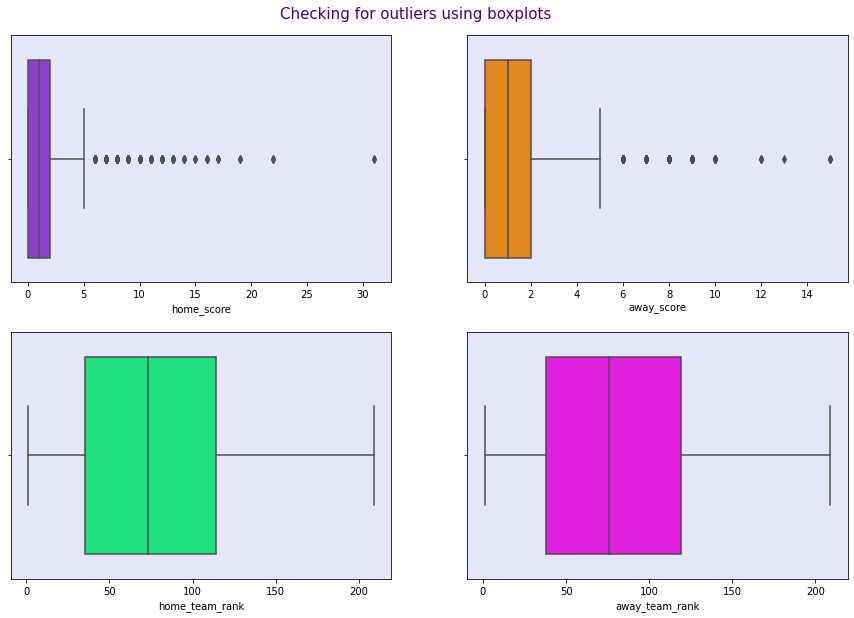

In [35]:
# Creating a list of columns to check for outliers
# Creating a list of colors
#
col_list = ['home_score', 'away_score', 'home_team_rank', 'away_team_rank']
colors = ['blueviolet', 'darkorange', 'springgreen', 'fuchsia']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
plt.suptitle('Checking for outliers using boxplots', fontsize = 15, y = 0.92, color = 'indigo')
for ax, data, column, color in zip(axes.flatten(), final_df2, col_list, colors):
  sns.boxplot(final_df2[column], ax = ax, color = color)
  ax.set_facecolor('lavender') # Setting the background color to lavender

In [36]:
# Creating a column of total goals scored
#
final_df2['total_goals'] = final_df2.home_score + final_df2.away_score

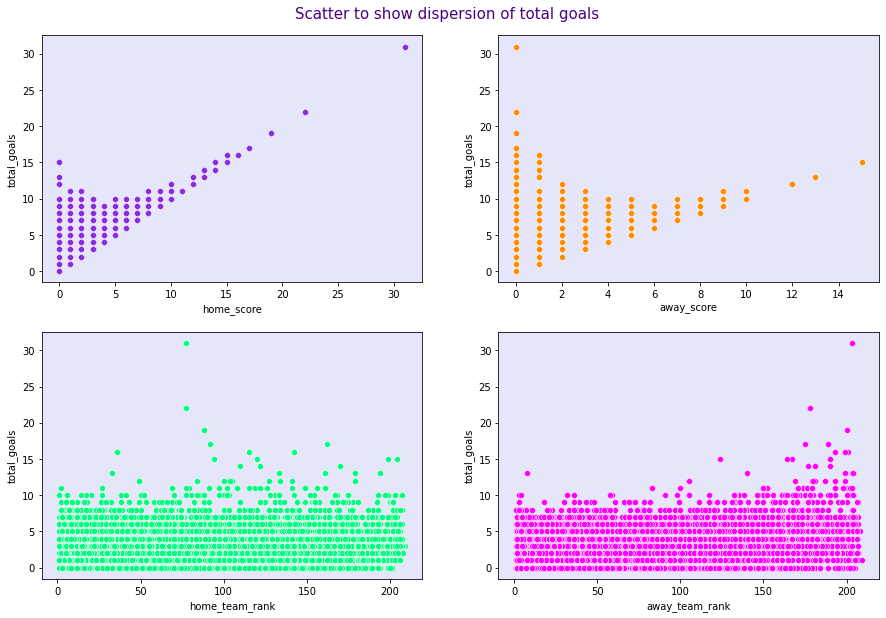

In [37]:
# Plotting scatter plots to show dispersion of total goals
# Setting the figure size to 15 by 10
#
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
plt.suptitle('Scatter to show dispersion of total goals', fontsize = 15, y = 0.92, color = 'indigo')
for ax, data, column, color in zip(axes.flatten(), final_df2, col_list, colors):
  sns.scatterplot(final_df2[column], final_df2.total_goals, ax = ax, color = color)
  ax.set_facecolor('lavender') # Setting the background color to lavender

Distribution of home and away goals

In [38]:
final_df2['home_score'].corr(final_df2['away_score'])

-0.16103314760208035

Text(0.5, 1.0, 'home_score vs away_score')

<Figure size 1440x2160 with 0 Axes>

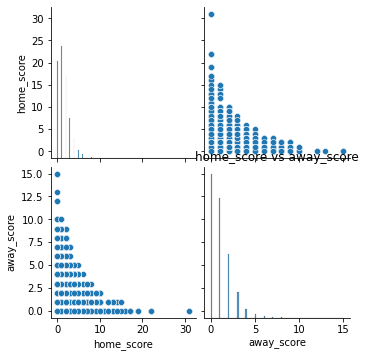

In [39]:
# Determine correlation between numeric features
plt.figure(figsize=(20,30))
sns.pairplot(final_df2[['home_score','away_score']])
plt.title('home_score vs away_score')

Text(0.5, 1.0, 'Distribution of countries per their homescores')

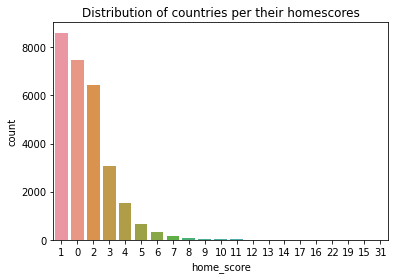

In [40]:
#Histogram of the ome scores of different countries
ax = sns.countplot(final_df2['home_score'], order = final_df2['home_score'].value_counts().index)
plt.title('Distribution of countries per their homescores')

Text(0.5, 1.0, 'Distribution of countries per their awayscores')

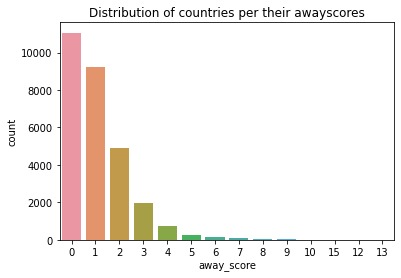

In [41]:
#Histogram of the ome scores of different countries
ax = sns.countplot(final_df2['away_score'], order = final_df2['away_score'].value_counts().index)
plt.title('Distribution of countries per their awayscores')

In [42]:
print(final_df2.skew())

home_score        2.542233
away_score        1.963031
neutral           0.760812
year             -0.045503
month            -0.123960
home_team_rank    0.400985
day_x            -0.162109
away_team_rank    0.398214
day_y            -0.162109
total_goals       1.497255
dtype: float64


In [43]:
print(final_df2.kurt())

home_score        17.961501
away_score         7.128364
neutral           -1.421265
year              -1.127915
month             -1.141479
home_team_rank    -0.733724
day_x             -0.752644
away_team_rank    -0.772951
day_y             -0.752644
total_goals        7.744513
dtype: float64


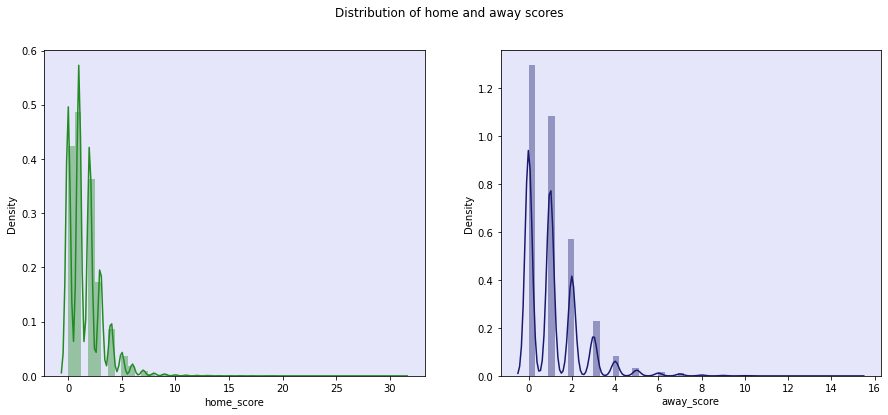

In [44]:

# Using displots to plot distribution of home and away scores
#
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 6))
plt.suptitle('Distribution of home and away scores')
for ax, data, column, color in zip(axes.flatten(), final_df2, ['home_score', 'away_score'], ['forestgreen', 'midnightblue']):
  sns.distplot(final_df2[column], ax = ax, hist = True, color = color)
  ax.set_facecolor('lavender')


Teams with highest number of goals in all of the tournaments

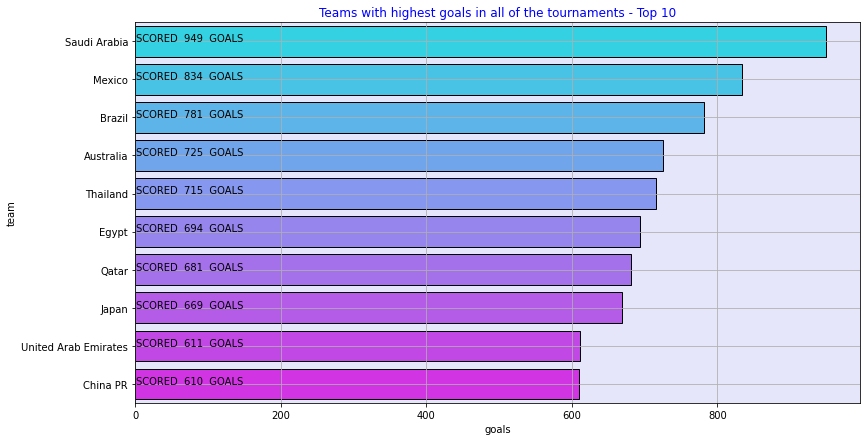

In [45]:
# Creating a dataframe of home teams with their total goals scored
#
total_goals_home = final_df2.groupby('home_team')['home_score'].sum().reset_index()
total_goals_home.columns = ['team', 'goals'] # Giving the dataframe column names

# Creating a dataframe of away teams with their total goals scored
#
total_goals_away = final_df2.groupby('away_team')['away_score'].sum().reset_index()
total_goals_away.columns = ['team', 'goals'] # Giving the dataframe column names

# Concating the two dataframes together and then grouping dataframes by team to find total goals scored
#
total_goals = pd.concat([total_goals_home, total_goals_away])
total_golas = total_goals.sort_values(by = 'goals', ascending = False, inplace = True) # sorting the teams by goals scored
total_goals.goals = total_goals.goals.astype(int) # Changing the datatype of the goals column to integer

plt.figure(figsize=(13,7))  # Creating a figure of length 13 and height 7
ax= sns.barplot("goals","team",data=total_goals[:10],palette="cool",linewidth=1, edgecolor="k"*20)

ax.set_facecolor('lavender') # Setting the background color to lavender

for i,j in enumerate("SCORED  " + total_goals["goals"][:10].astype(str) + "  GOALS"): # Annotating the barplot
    ax.text(.7,i,j,fontsize = 10, color="k")

plt.title("Teams with highest goals in all of the tournaments - Top 10",color='b')
plt.grid(True)
plt.show()

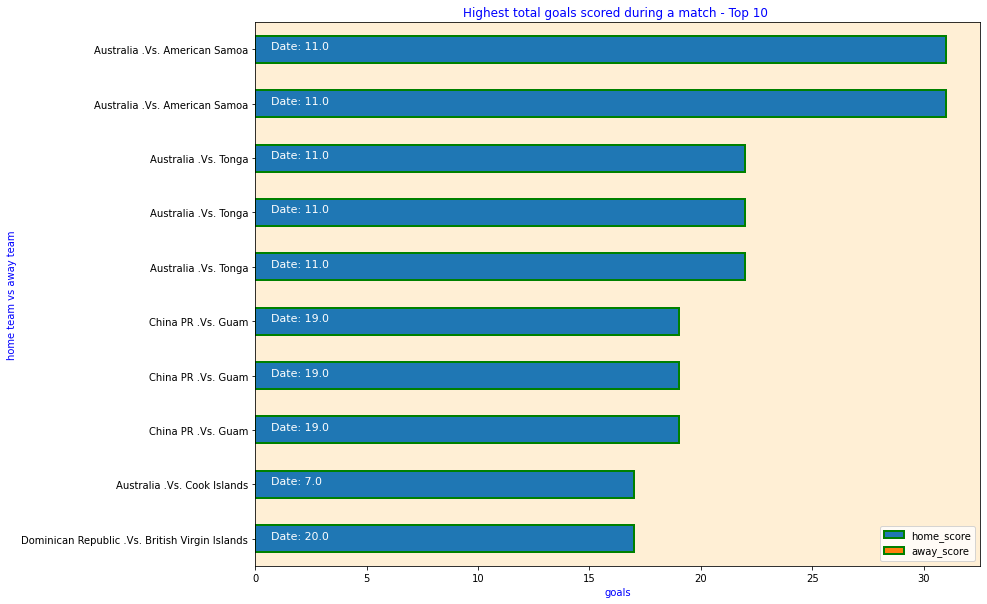

In [46]:

# Creating a dataframe of total goals scored and then sorting the dataframe by total goals
#
highest_goals = final_df2.sort_values(by = 'total_goals', ascending = False)[:10][['day_x', 'home_team', 'away_team', 'home_score', 'away_score', 'total_goals']]

# Creating the y axis label
#
highest_goals['match'] = highest_goals[['home_team', 'away_team']].apply(lambda x: ' .Vs. '.join(x), axis = 1)
highest_goals.index = highest_goals.match

highest_goals = highest_goals.sort_values(by = 'total_goals', ascending = True) # Sorting the dataframe by total goals

# Plotting a horizontal barchart
#
ax = highest_goals[['home_score', 'away_score']].plot(kind="barh",stacked=True,figsize=(13,10),linewidth=2,edgecolor="g"*15)

# Setting the background color to papayawhip
#
ax.set_facecolor('papayawhip')
highest_goals.day_x = highest_goals.day_x.astype(str)

plt.ylabel("home team vs away team",color="b") # Naming the y axis
plt.xlabel("goals",color="b") # Naming the x axis
plt.title("Highest total goals scored during a match - Top 10 ",color='b') # Giving the chart a title

# Using a for loop to annotate the chart
#
for i,j in enumerate('Date: ' + highest_goals.day_x):
    ax.text(.7,i,j,color="w",fontsize=11)
  
# Displaying the chart
plt.show()


The match with the highest number of gaols scored from the above chart is Australia Vs American Samoa


Total goals scored during games by year

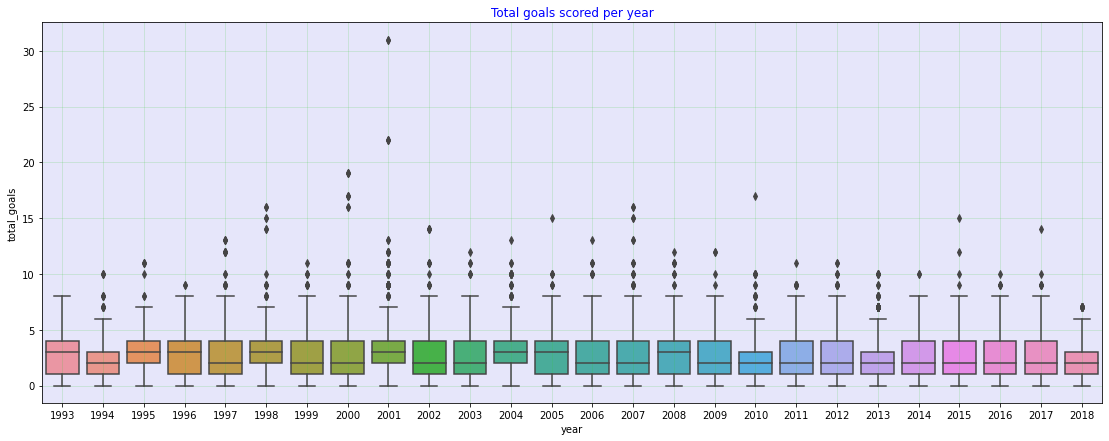

In [47]:

# Plotting boxplots of year against total goals scored
#
plt.figure(figsize=(19,7))  # Setting the figure size to 19 by 7
ax = sns.boxplot(y=final_df2.total_goals,x=final_df2.year) # Plotting the boxplots for each year
ax.set_facecolor('lavender')
plt.grid(True, color = 'limegreen', alpha = 0.2)
plt.title("Total goals scored per year",color='b')
plt.show()


The year 2001 had the highest number of total goals scored, and the year 2018 had the least number of goals scored

Average goals per year

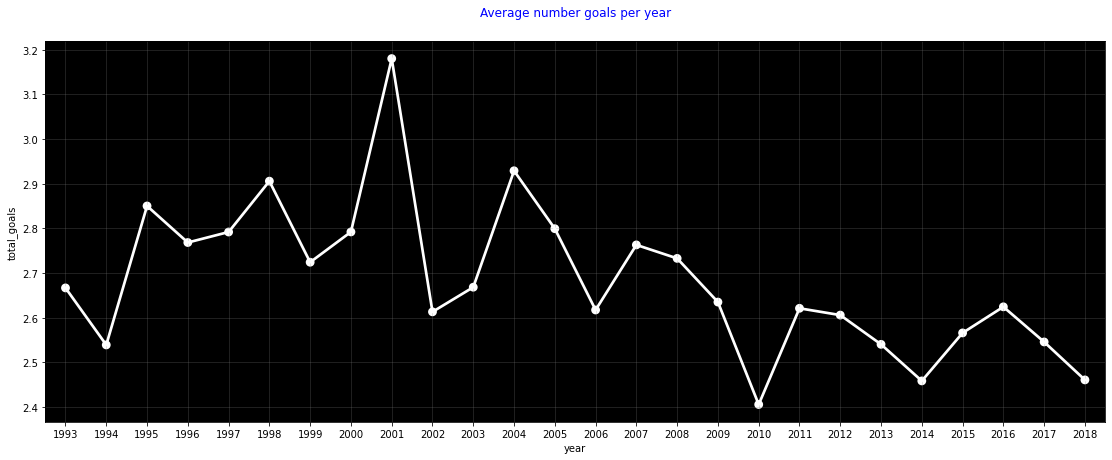

In [48]:
# Creating a dataframe of year and total goals
#
goals = final_df2.groupby('year')['total_goals'].mean().reset_index()
goals.year = goals.year.astype(int) # Changing the datatype of the year column to int

# Setting the figure size of the plot to 19 by 7
#
plt.figure(figsize=(19,7))
ax = sns.pointplot(goals.year,goals.total_goals,color="w") # Plotting a pointplot to show the trend of average goals scored across the years

ax.set_facecolor("k") # setting the background color to black, for contrast
plt.grid(True,color="grey",alpha=.3) # Setting the color of the grid lines to grey and setting the opacity to 0.3
plt.title("Average number goals per year",color='b', y = 1.05) # Giving the chart a title of color blue
plt.show()

Bivariate 

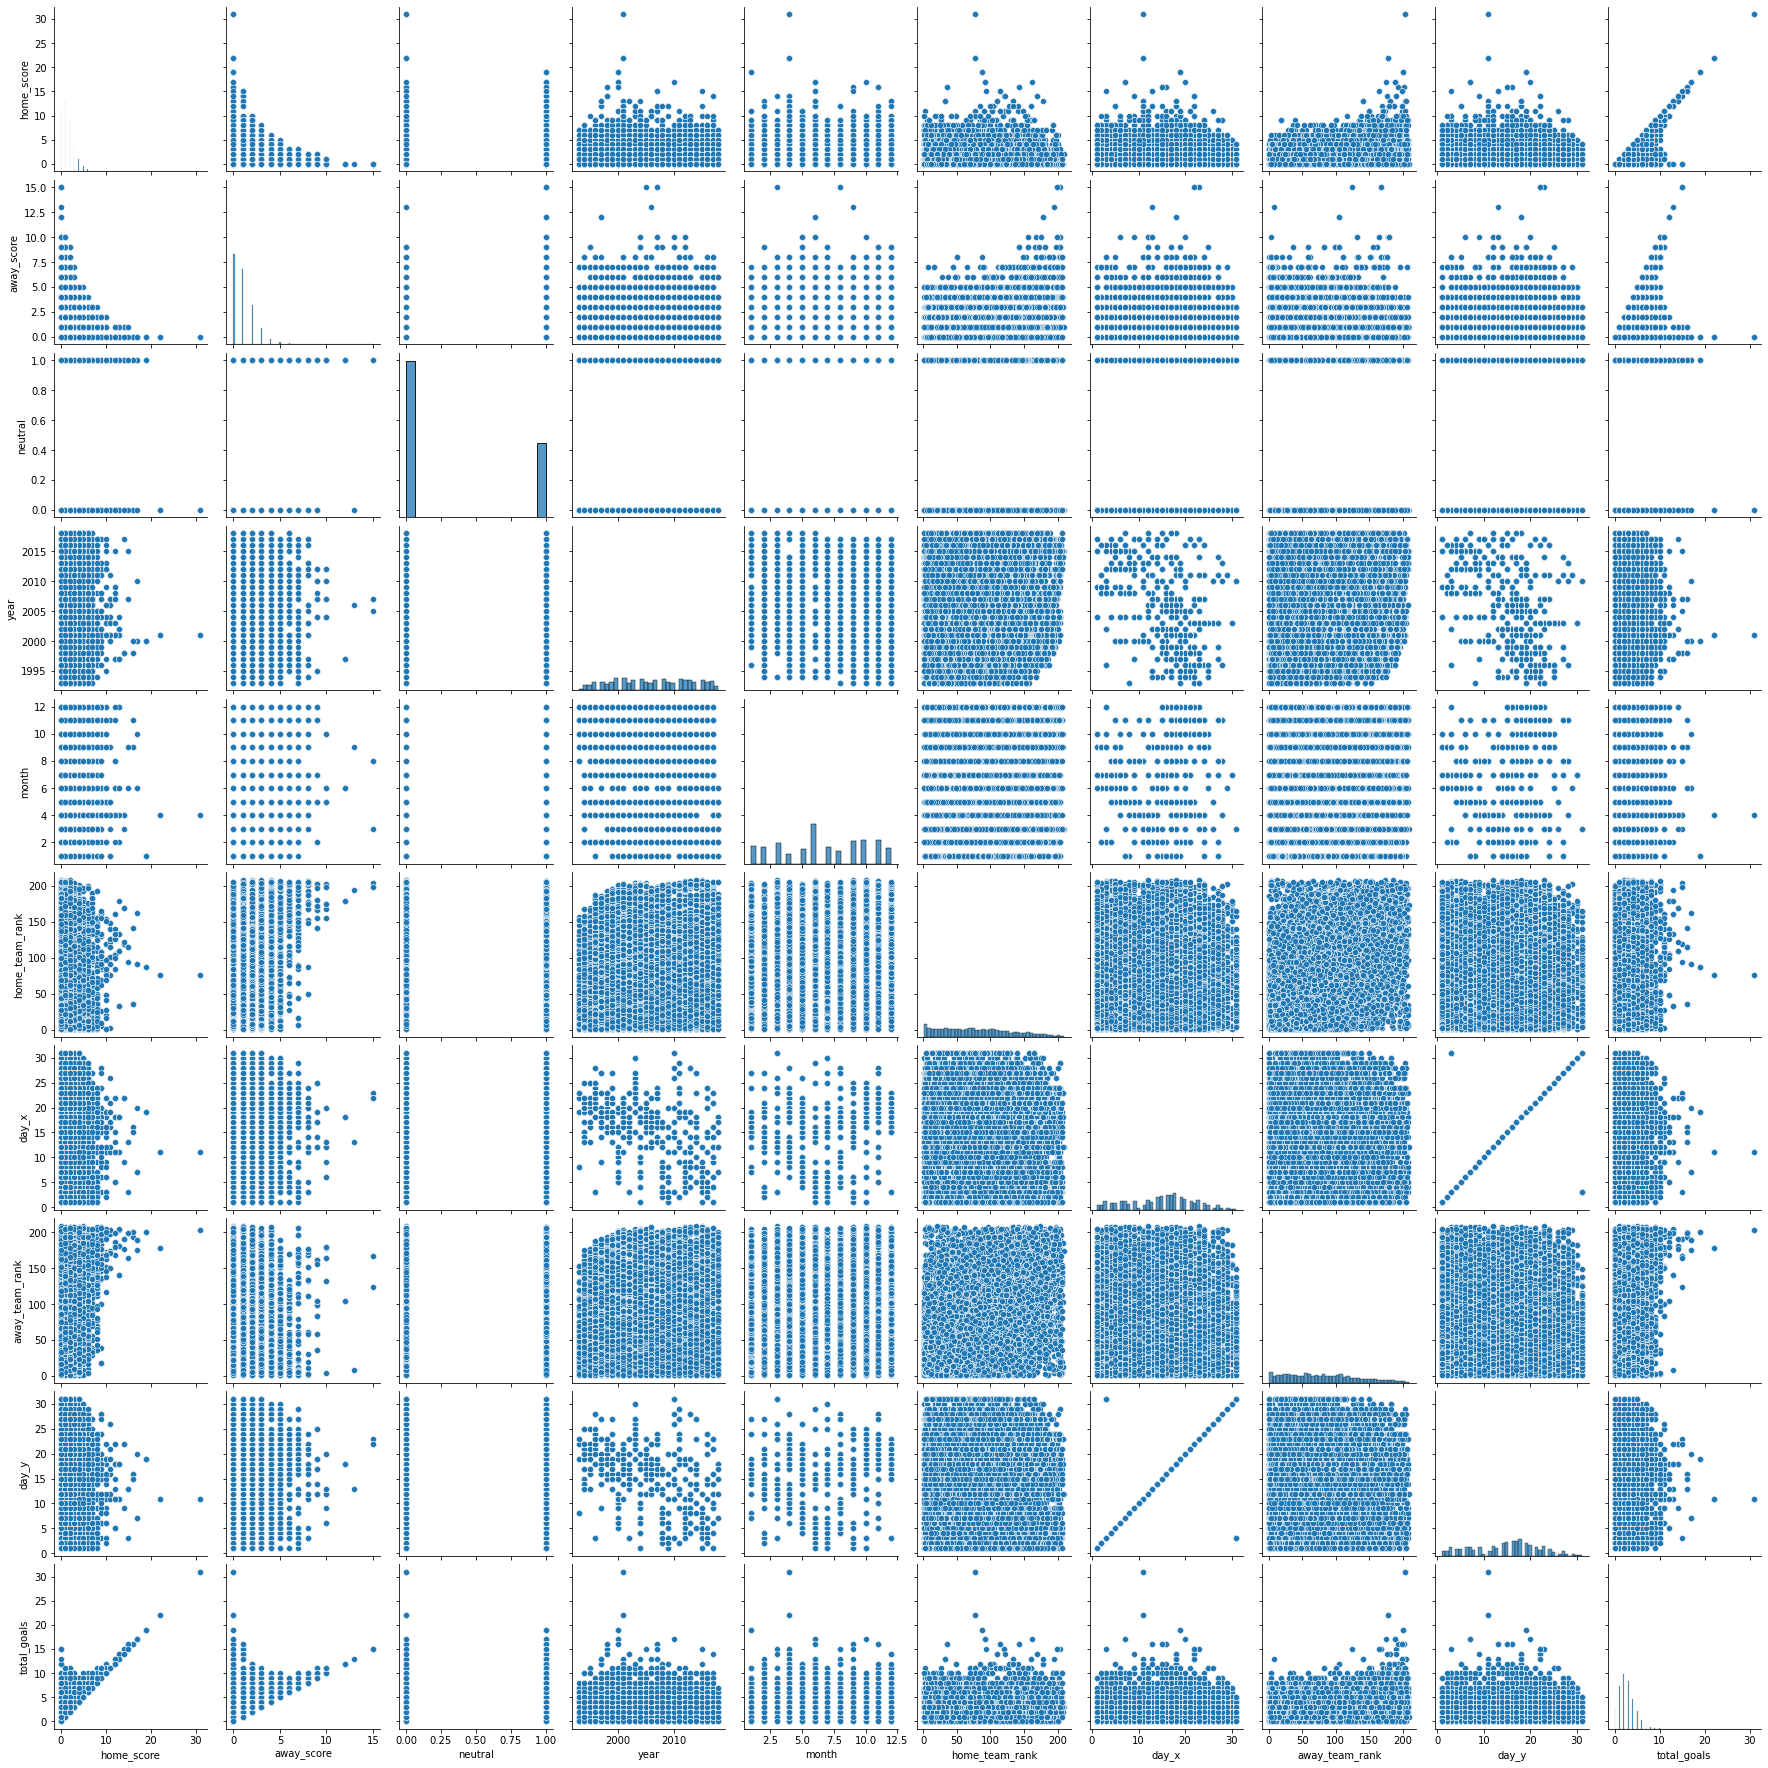

In [49]:
# Ploting the bivariate summaries and recording our observations
# scatterplot
sns.pairplot(final_df2)
plt.show()

In [50]:
# Calculating the pearson coefficient
pearson_coeff = final_df2["home_score"].corr(final_df2["away_score"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = final_df2["home_score"].corr(final_df2["away_score"])
print(coeff)

-0.16103314760208035
-0.16103314760208035


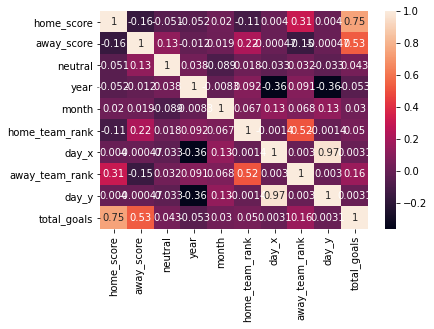

In [51]:
# heatmap
sns.heatmap(final_df2.corr(),annot=True)
plt.show()

In [52]:
#converting the tournament column to 3categories(Worldcup, friendly and other matches)
## Converting the tournament columns to: World cup, Friendly and others
def tournament(games):
    if (games == 'FIFA World Cup qualification') or (games == 'FIFA World Cup'):
        return 'World_Cup'
    if games == 'Friendly':
        return 'Friendly'
    else:
        return 'Other Matches'
# Applying the function above

final_df2['games'] = final_df2['tournament'].apply(lambda w: tournament(w))
final_df2['games'].unique()

array(['World_Cup', 'Friendly', 'Other Matches'], dtype=object)

In [53]:
#Converting the neutral categorical variable to numerical variable
#Using dummy indicators
final_df2['neutral'] = pd.get_dummies(final_df2['neutral'], drop_first=True)
final_df2.neutral.unique()

array([0, 1], dtype=uint8)


# Feature Engineering

In [54]:
#creating a column(final_score) that shows whether the match ended in a win, loss or draw
final_df2['final_score'] = final_df2['home_score'] - final_df2['away_score']
def home_team(home_score):
    if home_score > 0:
        return 'Win'
    elif home_score < 0:
        return 'Loss'
    else:
        return 'Draw'
      
final_df2['outcome'] = final_df2.final_score.apply(lambda h: home_team(h))
final_df2.head(5)

,home_team,away_team,home_score,away_score,tournament,country,neutral,year,month,home_team_rank,day_x,away_team_rank,day_y,total_goals,games,final_score,outcome
1224,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,0,1993,8,19.0,8.0,67.0,8.0,0,World_Cup,0,Draw
1225,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,0,1993,8,19.0,8.0,67.0,8.0,0,World_Cup,0,Draw
1226,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,0,1993,8,5.0,8.0,67.0,8.0,0,World_Cup,0,Draw
1227,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,0,1993,8,5.0,8.0,67.0,8.0,0,World_Cup,0,Draw
1228,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,0,1993,8,70.0,8.0,5.0,8.0,1,World_Cup,-1,Loss


In [55]:
final_df2['outcome'].unique()

array(['Draw', 'Loss', 'Win'], dtype=object)

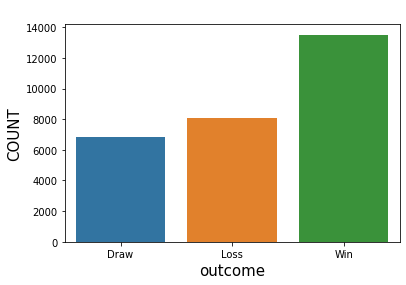

In [56]:

# visualizing the win draw and lose on a bar plot
sns.countplot('outcome',data = final_df2)
plt.xlabel("outcome",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of outcome",fontsize=16,color="white")
plt.show()
#generally, there is a high probability to win a match than lose or draw

In [57]:
#dropping the tournament column
final_df2.drop(columns=['tournament'], inplace=True)
final_df2.head(5)

,home_team,away_team,home_score,away_score,country,neutral,year,month,home_team_rank,day_x,away_team_rank,day_y,total_goals,games,final_score,outcome
1224,Colombia,Paraguay,0,0,Colombia,0,1993,8,19.0,8.0,67.0,8.0,0,World_Cup,0,Draw
1225,Colombia,Paraguay,0,0,Colombia,0,1993,8,19.0,8.0,67.0,8.0,0,World_Cup,0,Draw
1226,Argentina,Paraguay,0,0,Argentina,0,1993,8,5.0,8.0,67.0,8.0,0,World_Cup,0,Draw
1227,Argentina,Paraguay,0,0,Argentina,0,1993,8,5.0,8.0,67.0,8.0,0,World_Cup,0,Draw
1228,Peru,Argentina,0,1,Peru,0,1993,8,70.0,8.0,5.0,8.0,1,World_Cup,-1,Loss


## **Checking for multicollinearity**

Multicollinearity refers to a situation in which two or more explanatory variables in a multiple regression model are highly linearly related. We have perfect multicollinearity if, for example as in the equation above, the correlation between two independent variables is equal to 1 or −1

In [58]:

# Let's display the correlations between the variables
corr = final_df2[['home_score','away_score','home_team_rank','away_team_rank'	]].corr()
corr

,home_score,away_score,home_team_rank,away_team_rank
home_score,1.000000,-0.161033,-0.114510,0.307728
away_score,-0.161033,1.000000,0.221365,-0.151487
home_team_rank,-0.114510,0.221365,1.000000,0.515308
away_team_rank,0.307728,-0.151487,0.515308,1.000000


The table above shows us how each variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. Let's use these correlations to compute the VIF(Variance Inflation Factor) score for each variable.We create a new dataframe with the inverse of the matrix above

                home_score  away_score  home_team_rank  away_team_rank
home_score        1.244162    0.004487        0.460773       -0.619624
away_score        0.004487    1.169634       -0.475173        0.420664
home_team_rank    0.460773   -0.475173        1.726593       -1.103502
away_team_rank   -0.619624    0.420664       -1.103502        1.823044


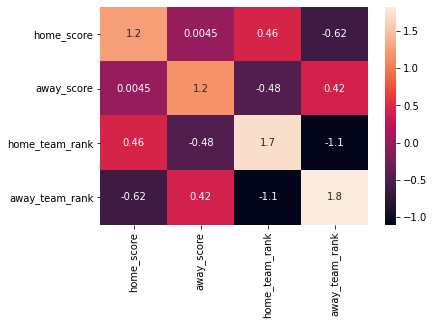

In [59]:
#computing the VIF(which is the inverse of the correlation matrix)
vif_df = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)
print(vif_df)


sns.heatmap(vif_df, annot = True)
plt.show()

**The heat map above shows VIF values that are very close to 0 meaning that there is very little multi-collinearity.**

# **Regression**

# **Approach 1: Using Polynomial regression.**


**Model 1: Predicting the Home_score**

In [60]:
final_df2.head(2)

,home_team,away_team,home_score,away_score,country,neutral,year,month,home_team_rank,day_x,away_team_rank,day_y,total_goals,games,final_score,outcome
1224,Colombia,Paraguay,0,0,Colombia,0,1993,8,19.0,8.0,67.0,8.0,0,World_Cup,0,Draw
1225,Colombia,Paraguay,0,0,Colombia,0,1993,8,19.0,8.0,67.0,8.0,0,World_Cup,0,Draw


In [61]:
#importing necessary libraries
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#defining X and y using the column locations
X = final_df2.iloc[:, [0,1,3,8,10,13]]
y = final_df2['home_score'].values
print(X.columns)

Index(['home_team', 'away_team', 'away_score', 'home_team_rank',
       'away_team_rank', 'games'],
      dtype='object')


In [62]:
X = pd.get_dummies(X, drop_first=True)
# Training 80% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
# This is our prediction for admission based on our model
y_pred = regressor.predict(X_test)
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix
# Let's describe our residual:
pd.DataFrame(residuals).describe()
print("The RMSE score for the model : ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("The residual mean score for the model : ", residuals.mean())


The RMSE score for the model :  1.353063758945362
The residual mean score for the model :  0.025063874005366225


The RMSE score for the model is quite high hence low predictive capability

In [63]:

# Tuning the parameters of the linear regression model to find the optimal 
# Printing the Linear Regression model parameters that can be tuned
#
from sklearn.linear_model import LinearRegression
LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
# The parameters that can be tuned are fitting the intercept and normalizing
# Creating a parameters dictionary
#
params = {'normalize': [True, False],
         'fit_intercept': [True, False]}

# Creating a cross validation of 10 folds
#
kfold = KFold(n_splits = 10)

# Using grid search to find the optimal parameters
#
grid_search = GridSearchCV(estimator=regressor, param_grid = params, cv = kfold, scoring = 'neg_mean_squared_error')

# Fitting the grid search 
#
grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score
#
print(f'Best score is {grid_search.best_score_} and the best parameters are {grid_search.best_params_}')

Best score is -1.202756476617498e+17 and the best parameters are {'fit_intercept': False, 'normalize': True}


Performing cross validation to check for overfitting or underfitting

In [65]:

# Performing cross validation of ten folds
#
scores = cross_val_score(regressor, X, y, scoring = 'neg_mean_squared_error', cv = 10)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {np.round(scores.mean()*-1, 3)}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {np.round(scores.std(), 3)}')

Mean of cross validation scores is 5.511710164112572e+17
Standard deviation of the cross validation scores is 1.6535130492337718e+18


## **Checking for Heteroskedasticity using Barlette's Test**

The concept of heteroscedasticity - the opposite being homoscedasticity - is used in statistics, especially in the context of linear regression or for time series analysis, to describe the case where the variance of errors or the model is not the same for all observations, while often one of the basic assumption in modeling is that the variances are homogeneous and that the errors of the model are identically distributed.

The barlett'stest establishes as a null hypothesis that the variance is equal for all our datapoints,and the new hypothesis that the variance is different for at least one pair of datapoints

In [66]:
# Performing the barlett's test
#
import scipy as sp
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# Calculating the critical value of the chi squared distribution, to compare it with the test_result
#
degrees_of_freedom = len(y_pred) - 1
probability =  1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degrees_of_freedom)

# If the test_result is greater than the critical value, then the null hypothesis is
# rejected. This means that there are patterns to the variance of the data

# Otherwise, if no patterns are identified, null hypothesis is accepted. This means that 
# the variance is homogeneous across the dataset

if (test_result > critical_value):
  print(f'The test result of {np.round(test_result,2)} is greater than the critical value of {np.round(critical_value, 2)}')
  print('Thefore the variances are unequal, which means that the model should be reassessed')
  print('The variances are heterogenous')
else:
  print(f'The test result of {np.round(test_result,2)} is less than the critical value of {np.round(critical_value, 2)}')
  print('Thefore the variances are equal, which means that the model is ok. No need to reasses')
  print('The variances are homogeneous')


The test result of 670.72 is less than the critical value of inf
Thefore the variances are equal, which means that the model is ok. No need to reasses
The variances are homogeneous


## **Checking the appripriateness of the model using a residual plot**

A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.

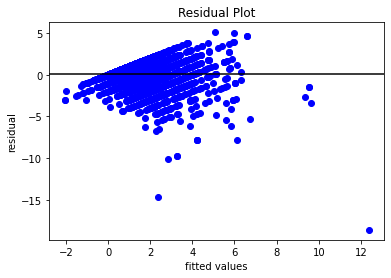

In [67]:
residuals = y_pred - y_test

# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='blue')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='black')
plt.show()

In [68]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = final_df2.iloc[:, [0,1,2,8,10,13]]
y = final_df2['away_score'].values

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for admission based on our model
y_pred = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix
# Let's describe our residual:
pd.DataFrame(residuals).describe()
print("The RMSE score for the model : ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("The residual mean score for the model : ", residuals.mean())

The RMSE score for the model :  1.1130505457819193
The residual mean score for the model :  -0.02272332076511144


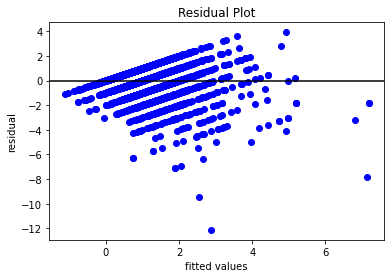

In [69]:
residuals = y_pred - y_test

# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='blue')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='black')
plt.show()

# Approach 2: Logistic Regression

Create a model that can predict whether the home team will win, draw or lose


In [70]:
# Selecting the relevant features for the logistic regression model
#
data = final_df2[['home_team', 'away_team', 'home_score', 'away_score', 'games', 'year', 'home_team_rank', 'away_team_rank', 'outcome']]

# Previewing the first five rows of the data
#
data.head()

,home_team,away_team,home_score,away_score,games,year,home_team_rank,away_team_rank,outcome
1224,Colombia,Paraguay,0,0,World_Cup,1993,19.0,67.0,Draw
1225,Colombia,Paraguay,0,0,World_Cup,1993,19.0,67.0,Draw
1226,Argentina,Paraguay,0,0,World_Cup,1993,5.0,67.0,Draw
1227,Argentina,Paraguay,0,0,World_Cup,1993,5.0,67.0,Draw
1228,Peru,Argentina,0,1,World_Cup,1993,70.0,5.0,Loss


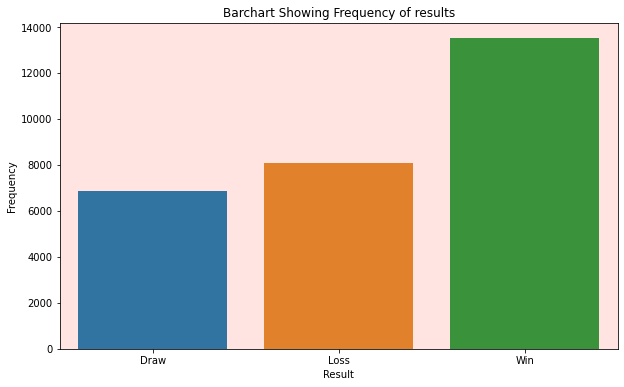

In [71]:
# Checking whether the data is well balanced between all the results; win draw or lose
#
plt.figure(figsize = (10, 6))
ax = sns.countplot(data.outcome)
ax.set_facecolor('mistyrose')
plt.ylabel('Frequency')
plt.xlabel('Result')
plt.title('Barchart Showing Frequency of results')
plt.show()



From the above chart, the results are fairly balanced

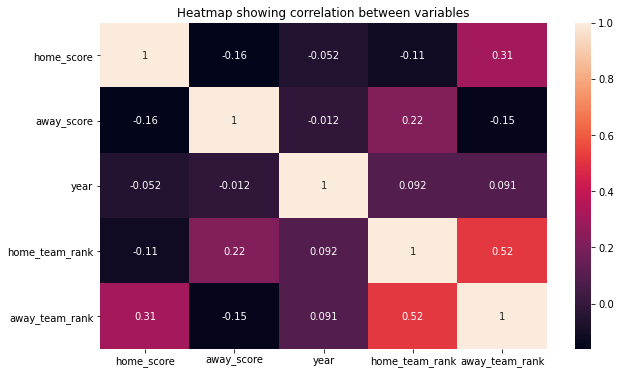

In [72]:
# Checking for correlations between features
#
plt.figure(figsize = (10, 6))
sns.heatmap(data.corr(), annot = True) 
plt.title('Heatmap showing correlation between variables')
plt.show()

In [73]:

# Testing my model with several classiffiers to see the better classifier
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Several list of classifiers
classifier = []
classifier.append(('Logistic Regression ', LogisticRegression(solver='liblinear', multi_class='ovr')))
classifier.append(('Random Forest ', RandomForestClassifier()))
classifier.append(('GussianNB ', GaussianNB()))
#classifier.append(('SVM ', SVC(gamma='auto')))

res = []
names = []

# Implementing cross valiadtaion
for name, model in classifier:
   kfold = KFold(n_splits=5, random_state=0)
   cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
   res.append(cv_results)
   names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)
    
## We can see that logistic reggresion has the highest accuracy.
## thus we use it for classification modelling

Logistic Regression : 0.428157 (0.006799)
Random Forest : 0.711661 (0.004768)
GussianNB : 0.119643 (0.005638)


### **Hyperparameter tuning**

In [74]:
# Displaying parameters of the logistic regression model that can be tuned
#
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
# Creating a dictioanry of parameters to be tuned
#
params = {'C': [1.0, 5.0],
         'penalty': ['l1', 'l2']}

logistic = LogisticRegression()

# Creating a cross validation of 10 folds
#
kfold = KFold(n_splits = 10)

# Using grid search to find the optimal parameters
#
grid_search = GridSearchCV(estimator=logistic, param_grid = params, cv = kfold, scoring = 'accuracy')

# Fitting the grid search 
#
grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score
#
print(f'Best score is {grid_search.best_score_} and the best parameters are {grid_search.best_params_}')

Best score is 0.4136921414306019 and the best parameters are {'C': 1.0, 'penalty': 'l2'}


###  9. Follow up questions
a). Did we have the right data?
NO!

b). Do we need other data to answer our question?
YES! More conclusive features should be included.

c). Did we have the right question?
YES! Football is greatly loved sport and predicting the outcome of a match based on previous outcomes is an interesting challenge.

Conclusion
Polynomial Regression and Logistic Regression do not yield an accurate model to predict the FIFA outcomes hence other Modelling techniques should be considered